# Customer Churn Analysis

In [1]:
from IPython.display import Image
Image(url= "https://d2mkz4zdclmlek.cloudfront.net/images/articles/2-things-that-will-reduce-your-churn.png")

## Introduction

### Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
### Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. 
### In this project the target variable is churn.

## Libraries

In [66]:
!pip install xgboost

In [44]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# I have import important libraries for this project in one go so that it will save time.

## Dataset

In [63]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
# From the dataset i can say that there are few columns in integer and few are in strings.
# All the columns have vital information so i will not be dropping any columns from the dataset.

## EDA - Exploratory Data Analysis

In [65]:
df.shape

(7043, 21)

In [66]:
# There are 7043 rows and 21 columns in the dataset.

In [67]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
# It is a mixed dataset as 18 columns are object type ,2 columns are integers type and 1 columns are float type.
# There is no missing values in any columns as count is 7043 for every columns.

In [69]:
df.drop_duplicates(inplace = True)

In [70]:
df.shape

(7043, 21)

In [114]:
# There are no duplicates in the dataset.

In [115]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [73]:
# There are few columns which are categorical in nature and few columns are continous in nature.

In [74]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [75]:
# Total number of counts in each columns is matching as there is no missing values.
# The difference between the mean and 50% is not much.
# There are outlires in the dataset which i will remove it soon.

### Data Visualization

### Pair Plot

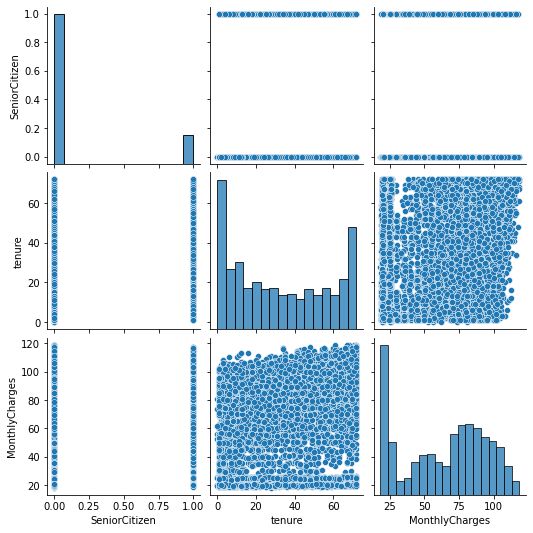

In [75]:
sns.pairplot(df)

In [9]:
# The above pair plot gives us the clear idea that target variable 'Churn' are positively corelated with few feature.
# Only few columns are not correlated.

### Cat Plot

#### tenure

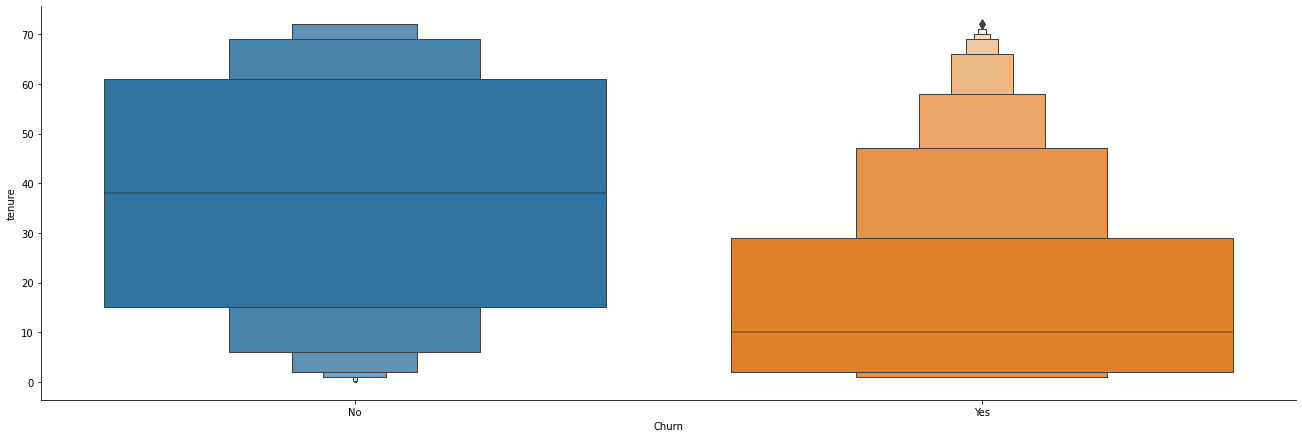

In [76]:
sns.catplot(y="tenure",x="Churn",data=df.sort_values("tenure",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [10]:
# Churn rate is low when tenure is above 70.

### Strip Plot

#### MonthlyCharges

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

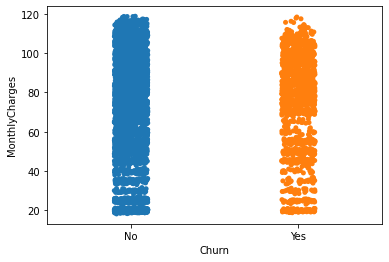

In [63]:
sns.stripplot(df['Churn'],df['MonthlyCharges'])

In [13]:
# Churn rate is high if the customer is paying approx 40 or very high.
# Churn rate is almost nil of customer is paying 100 approx.

#### TotalCharges

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

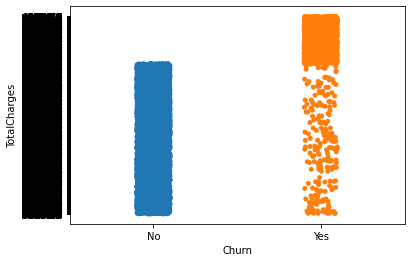

In [64]:
sns.stripplot(df['Churn'],df['TotalCharges'])

In [14]:
# The above strip plot clearly indicates the churn rate is high if total charges in low and vise versa.

### Count Plot & Pie Plot

#### Churn

In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

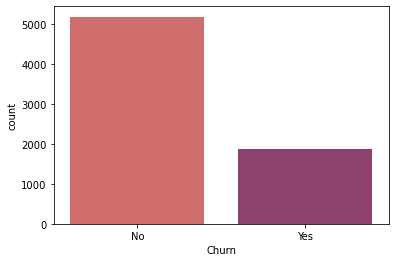

In [17]:
sns.countplot(df['Churn'],palette = 'flare', data = df)

In [15]:
# Dataset gives me an clear idea that churned customer is 1869 and not churned customer is 5174

#### Gender

In [10]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

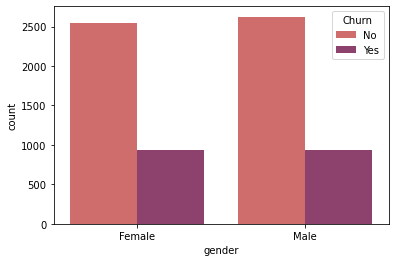

In [11]:
sns.countplot(df['gender'],palette = 'flare',hue='Churn', data = df)

In [16]:
# I can say that gender ratio as compared to churn are almost same.

<AxesSubplot:ylabel='gender'>

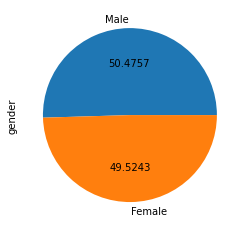

In [424]:
df['gender'].value_counts().plot(kind="pie",autopct = '%.4f')

In [17]:
# Both male and female ratio is almost same in terms of getting churned.

### Bar Plot

**SeniorCitizen**

In [13]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

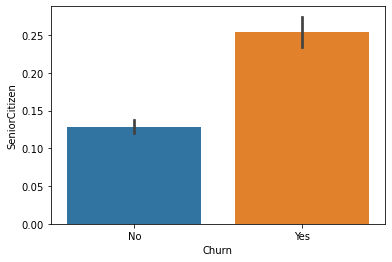

In [14]:
sns.barplot(df['Churn'],df['SeniorCitizen'])

In [18]:
# Those who are senior citizen are not getting churned.

### Count Plot & Pie Plot

**Partner**

In [21]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

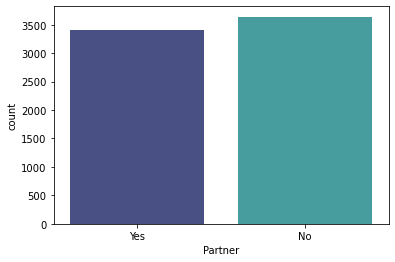

In [22]:
sns.countplot(df['Partner'],palette = 'mako',data = df)

In [19]:
# From partner columns i can say that partner doesn't affect much in getting churned.

**Dependents**

In [23]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

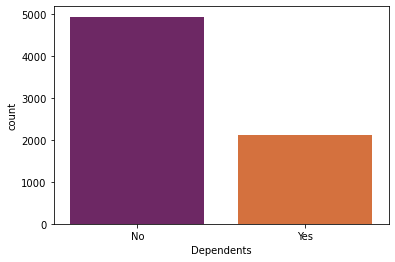

In [59]:
sns.countplot(df['Dependents'],palette = 'inferno', data = df)

In [20]:
# In this dataset there are less number of dependents.

<AxesSubplot:ylabel='Dependents'>

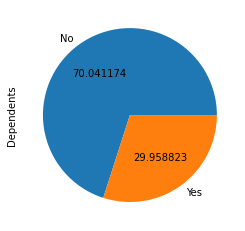

In [25]:
df['Dependents'].value_counts().plot(kind="pie",autopct = '%5f')

In [21]:
# In this dataset there are less number of dependents.

**PhoneService**

In [26]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

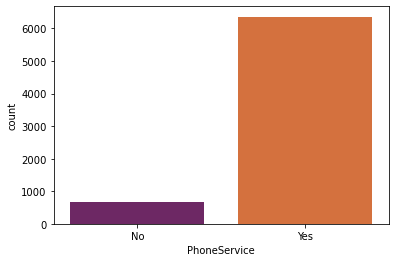

In [27]:
sns.countplot(df['PhoneService'],palette = 'inferno', data = df)

In [22]:
# Dataset gives me an clear idea that more number of customers use phone services

**MultipleLines**

In [28]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

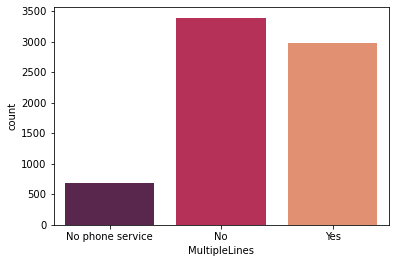

In [29]:
sns.countplot(df['MultipleLines'],palette = 'rocket', data = df)

In [23]:
# Dataset gives me an clear idea that more number of customers use no multiple lines.

<AxesSubplot:ylabel='MultipleLines'>

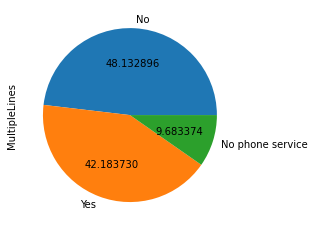

In [41]:
df['MultipleLines'].value_counts().plot(kind = "pie", autopct = '%5f')

In [24]:
# Dataset gives me an clear idea that more number of customers use no multiple lines.

**InternetService**

In [30]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

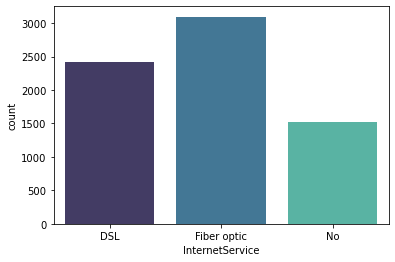

In [31]:
sns.countplot(df['InternetService'],palette='mako',data=df)

In [25]:
# Most of the customers use fibre optic internet service.

<AxesSubplot:ylabel='InternetService'>

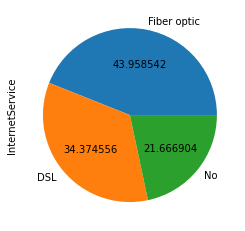

In [32]:
df['InternetService'].value_counts().plot(kind = "pie", autopct = '%5f')

In [26]:
# Most of the customers use fibre optic internet service.

### OnlineSecurity

In [33]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

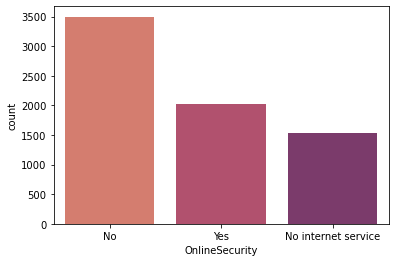

In [34]:
sns.countplot(df['OnlineSecurity'],palette='flare',data=df)

In [27]:
# Most of the customer haven't opt for OnlineSecurity.

<AxesSubplot:ylabel='OnlineSecurity'>

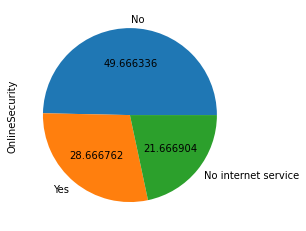

In [35]:
df['OnlineSecurity'].value_counts().plot(kind = "pie", autopct = '%5f')

In [28]:
# Most of the customer haven't opt for OnlineSecurity.

**OnlineBackup**

In [36]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

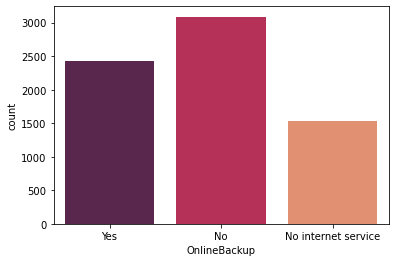

In [37]:
sns.countplot(df['OnlineBackup'],palette='rocket',data=df)

In [29]:
# Most of the customer don't have OnlineBackup.

<AxesSubplot:ylabel='OnlineBackup'>

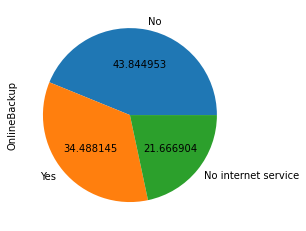

In [38]:
df['OnlineBackup'].value_counts().plot(kind = "pie", autopct = '%5f')

In [30]:
# Most of the customer don't have OnlineBackup.

**DeviceProtection**

In [39]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

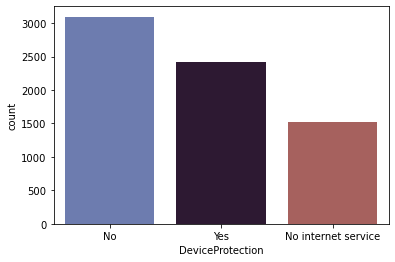

In [40]:
sns.countplot(df['DeviceProtection'],palette='twilight',data=df)

In [32]:
# Most of the customer don't have DeviceProtection.

<AxesSubplot:ylabel='DeviceProtection'>

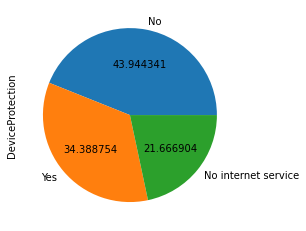

In [41]:
df['DeviceProtection'].value_counts().plot(kind = "pie", autopct = '%5f')

In [33]:
# Most of the customer don't have DeviceProtection.

**TechSupport**

In [42]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

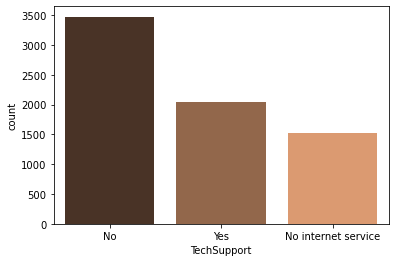

In [43]:
sns.countplot(df['TechSupport'],palette='copper',data=df)

In [34]:
# Most of the customer don't have TechSupport.

<AxesSubplot:ylabel='TechSupport'>

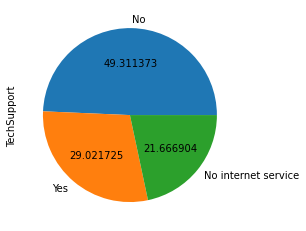

In [44]:
df['TechSupport'].value_counts().plot(kind = "pie", autopct = '%5f')

In [35]:
# Most of the customer don't have TechSupport.

**StreamingTV**

In [45]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

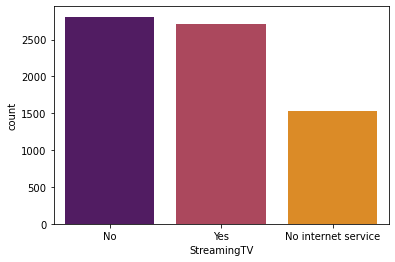

In [46]:
sns.countplot(df['StreamingTV'],palette='inferno',data=df)

In [36]:
# Most of the customer don't have StreamingTV.

<AxesSubplot:ylabel='StreamingTV'>

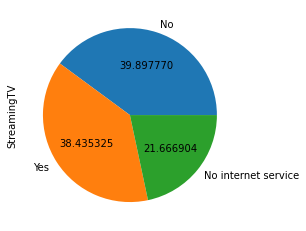

In [47]:
df['StreamingTV'].value_counts().plot(kind = "pie", autopct = '%5f')

In [37]:
# Most of the customer don't have StreamingTV.

**StreamingMovies**

In [48]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

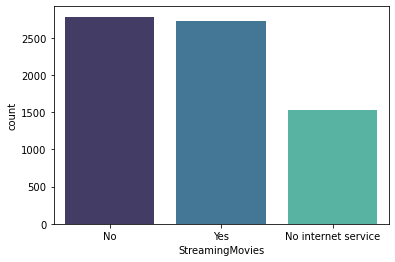

In [49]:
sns.countplot(df['StreamingMovies'],palette='mako',data=df)

In [38]:
# Most of the customer don't have StreamingMovies.

**Contract**

In [50]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

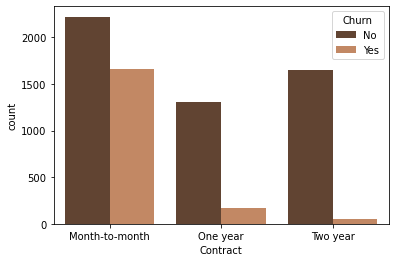

In [51]:
sns.countplot(df['Contract'],palette='copper',hue='Churn',data=df)

In [39]:
# Those who are in month to month contract are highest in number getting churned.

<AxesSubplot:ylabel='Contract'>

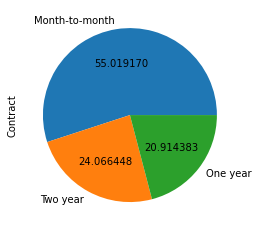

In [52]:
df['Contract'].value_counts().plot(kind = "pie", autopct = '%5f')

In [40]:
# Those who are in month to month contract are highest in number getting churned.

**PaperlessBilling**

In [53]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

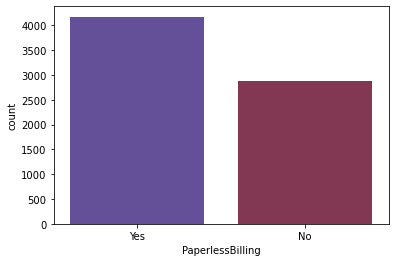

In [54]:
sns.countplot(df['PaperlessBilling'],palette='twilight',data=df)

In [41]:
# Most of the customer do have PaperlessBilling.

**PaymentMethod**

In [55]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

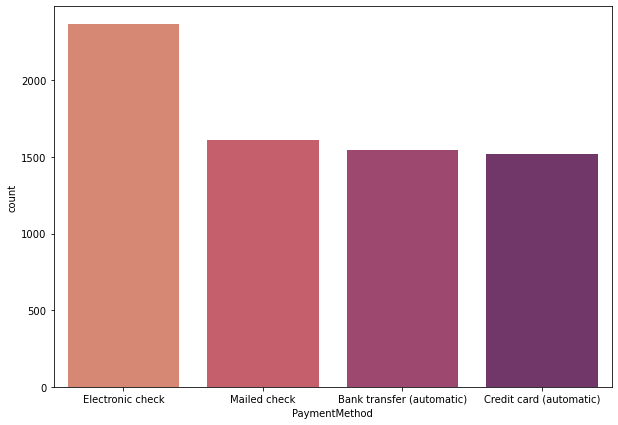

In [56]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['PaymentMethod'],palette='flare',data=df)

In [42]:
# Most of the customer use electronic check as a payment method.

<AxesSubplot:ylabel='PaymentMethod'>

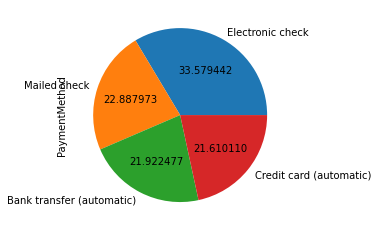

In [57]:
df['PaymentMethod'].value_counts().plot(kind = "pie", autopct = '%4f')

In [43]:
# Most of the customer use electronic check as a payment method.

## Heat Map

[]

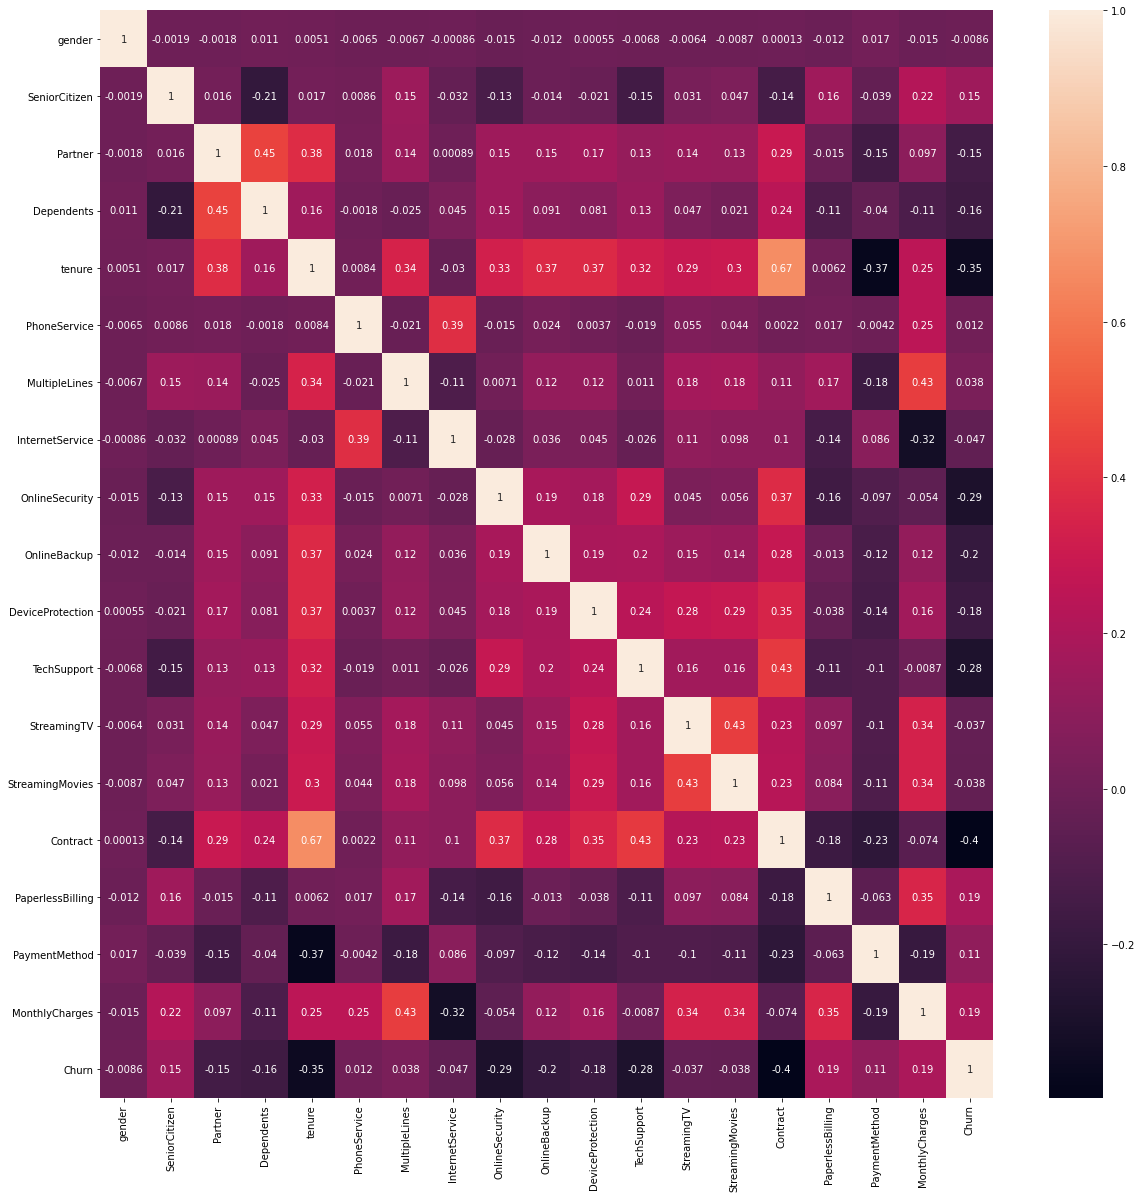

In [48]:
df_cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [49]:
# gender and device protection is positively correlated with each other.
# dependents and device protection is positively correlated with each other.
# tenure and contract is positively correlated with each other.
# tenure and payment method are negatively correlated to each other.
# monthly charges and internet services are negatively correlated to each other.

In [76]:
df.drop('customerID',inplace=True,axis=1)
df.drop('TotalCharges',inplace=True,axis=1)

In [50]:
# I have drop 2 columns from the dataset as it is not relevant for model prediction.

## Label Encoder

In [77]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.Partner = le.fit_transform(df.Partner)
df.Dependents = le.fit_transform(df.Dependents)
df.PhoneService = le.fit_transform(df.PhoneService)
df.MultipleLines = le.fit_transform(df.MultipleLines)
df.InternetService = le.fit_transform(df.InternetService)
df.OnlineSecurity = le.fit_transform(df.OnlineSecurity)
df.OnlineBackup = le.fit_transform(df.OnlineBackup)
df.DeviceProtection = le.fit_transform(df.DeviceProtection)
df.TechSupport = le.fit_transform(df.TechSupport)
df.StreamingTV = le.fit_transform(df.StreamingTV)
df.StreamingMovies = le.fit_transform(df.StreamingMovies)
df.Contract = le.fit_transform(df.Contract)
df.PaperlessBilling = le.fit_transform(df.PaperlessBilling)
df.PaymentMethod = le.fit_transform(df.PaymentMethod)
df.Churn = le.fit_transform(df.Churn)

In [78]:
# I have used label encoder to convert the strings values into intergers.
# It will help me in model building.

## Distribution Plot

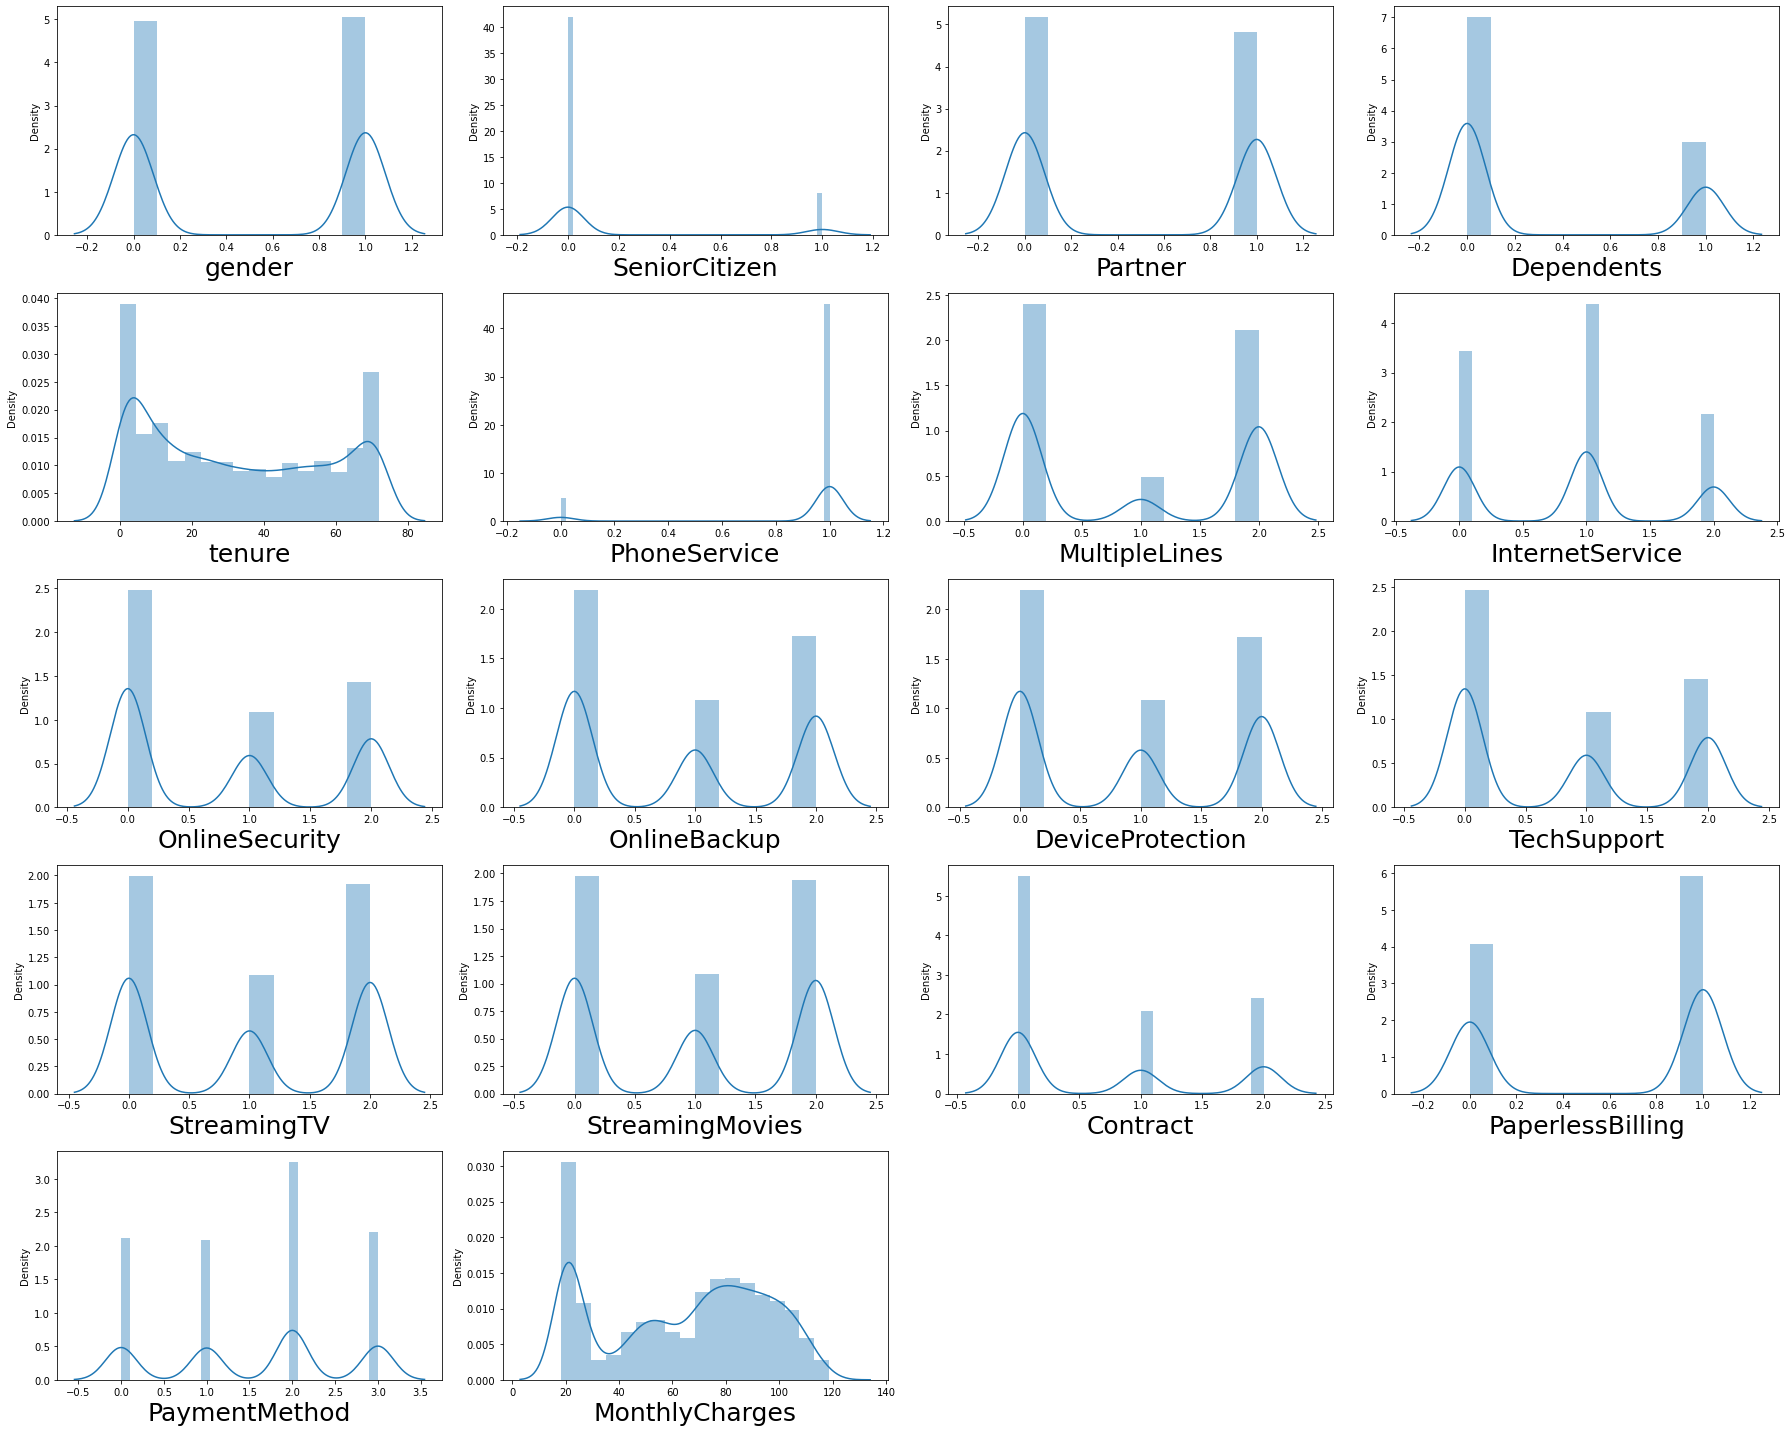

In [83]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [52]:
# There are skewness in the dataset which i will remove soon.
# There are few zero values as well that also need to be taken care.

### Replacing  zero value from tenure column

In [79]:
# Replacing continous columns with mean
df['tenure'] = df['tenure'].replace(0,df['tenure'].mean())

In [53]:
# There are few zero values that got replaced with the help of mean.

## Box Plot

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

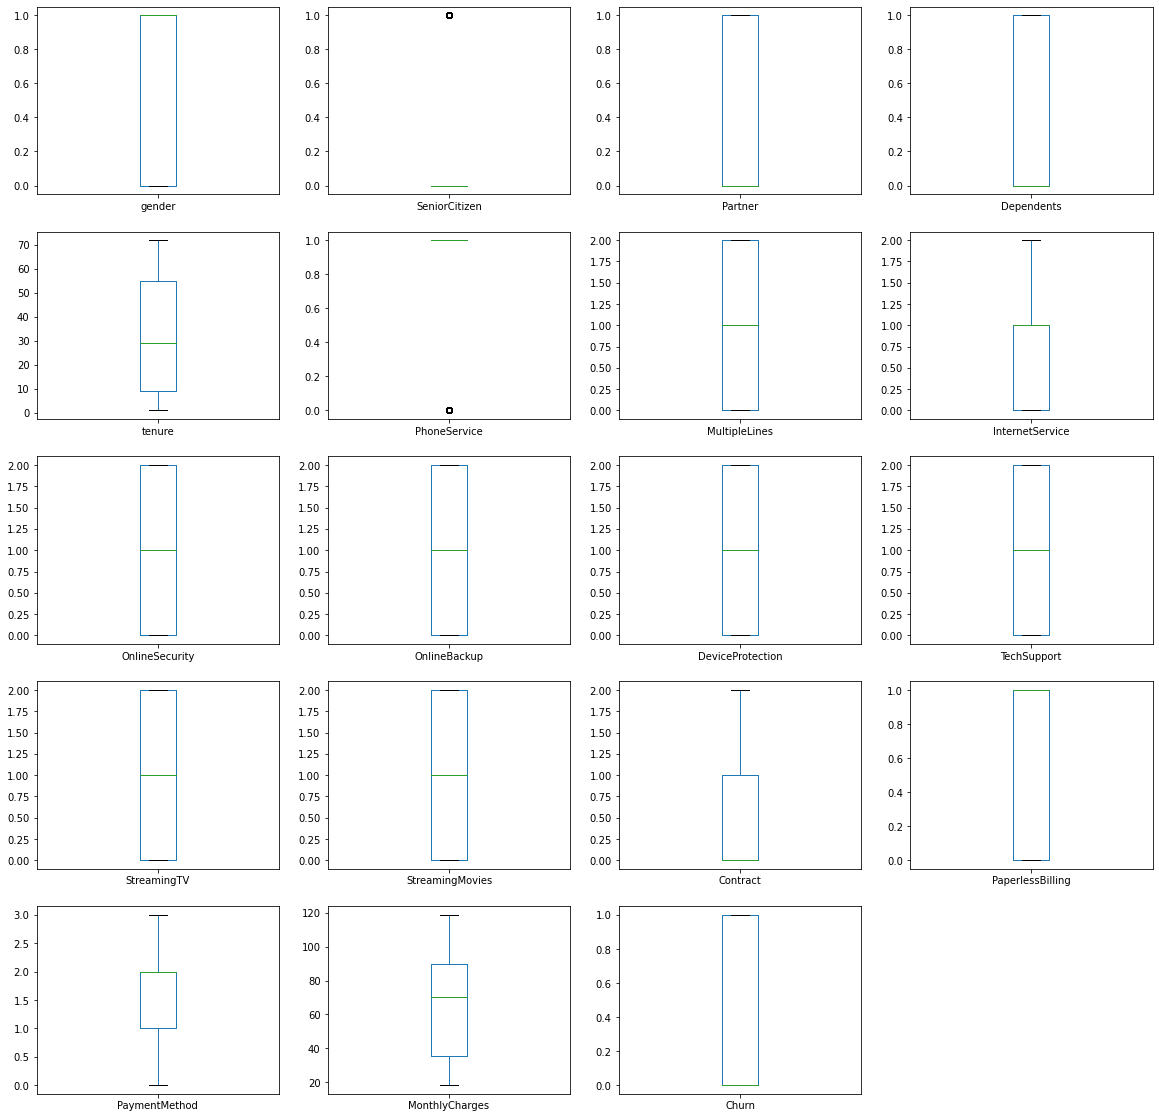

In [85]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

In [55]:
# There are no outliers in the dataset.

# Machine Learning

In [80]:
x = df.drop('Churn',axis=1)
y = df.Churn

In [56]:
# I have divided dataset into feature and label.

## StandardScaler

In [81]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

In [57]:
# Standard scaler is basically scaling the date in one range so that it will be easy for Model building.

### VIF - variance inflation factor

In [82]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.001700,gender
1,1.149735,SeniorCitizen
2,1.461472,Partner
3,1.381632,Dependents
4,2.789733,tenure
5,1.622403,PhoneService
6,1.392799,MultipleLines
7,1.825876,InternetService
8,1.247905,OnlineSecurity
9,1.186754,OnlineBackup


In [58]:
# VIF is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.
# Multicollinearity is a phenomenon when two or more independent variables are highly intercorrelated.
# From the above stats i can say that none of the features are highly intercorrelated it means Multicollinearity doesn't exist.

## Visualize the correlation

In [83]:
df.drop('Churn',axis=1).corrwith(df.Churn)

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.353947
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
dtype: float64

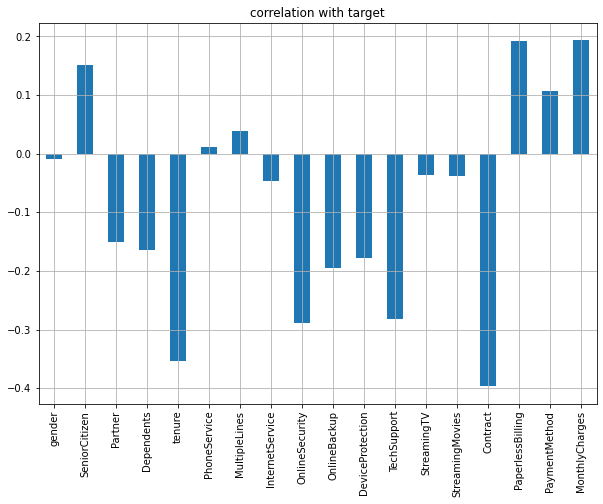

In [84]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

In [59]:
# The above plot gives me an clear idea that few columns are positively correlated and few are negatively correlated with label.
# However i will use all the columns for model prediction.

## Model Building

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

In [60]:
# For model prediction i am dividing the dataset into 2 parts.
# One part is used for training purpose i.e 75% dataset.
# other part is used for testing purpose i.e 25% dataset.

## Logistic Regression

In [187]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [188]:
y_pred = log_reg.predict(x_test)

In [189]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1150,  136],
       [ 214,  261]], dtype=int64)

In [190]:
log_reg.score(x_test,y_test)

0.8012492901760363

In [192]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1286
           1       0.66      0.55      0.60       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [61]:
# Logistic Regression accuracy score 80%

### Auc Score

In [193]:
roc_auc_score(y_test,log_reg.predict(x_test))

0.7218597036915773

## KNN

### Using SelectKBest Method for best features selection

In [89]:
best_features = SelectKBest(score_func=f_classif,k=16)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate DataFrame
feature_scores = pd.concat([df_columns,df_scores],axis = 1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(16,'Score'))

       Features_Name        Score
14          Contract  1315.088872
4             tenure  1008.421408
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674


### KNN model Building

In [90]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [91]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1091,  195],
       [ 244,  231]], dtype=int64)

In [92]:
knn.score(x_test,y_test)

0.750709823963657

In [93]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1286
           1       0.54      0.49      0.51       475

    accuracy                           0.75      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.74      0.75      0.75      1761



## Let use Grid search CV for the best parameter to improve the accuracy

In [94]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [95]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [96]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [97]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [98]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [100]:
y_pred = knn.predict(x_test)

In [101]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1098,  188],
       [ 235,  240]], dtype=int64)

In [102]:
knn.score(x_test,y_test)

0.7597955706984668

In [103]:
# Finding classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1286
           1       0.56      0.51      0.53       475

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.69      1761
weighted avg       0.75      0.76      0.76      1761



In [105]:
# In KNN algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving the accuracy score by 1%.
# KNN Accuracy Score 76%.

### Auc Score

In [104]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.6795367111402145

## RandomForestClassifier

In [124]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [125]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1149,  137],
       [ 245,  230]], dtype=int64)

In [126]:
rfc.score(x_test,y_test)

0.7830777967064169

In [127]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1286
           1       0.63      0.48      0.55       475

    accuracy                           0.78      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



### Let use Grid search CV for the best parameter to improve the accuracy

In [128]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [129]:
rfc = grd.best_estimator_

In [130]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [131]:
y_pred = rfc.predict(x_test)

In [132]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1173,  113],
       [ 228,  247]], dtype=int64)

In [133]:
rfc.score(x_test,y_test)

0.8063600227143668

In [135]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1286
           1       0.69      0.52      0.59       475

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [106]:
# In Random forest algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving accuracy score by 3%.
# Random forest Accuracy Score 81%.

### Auc Score

In [136]:
roc_auc_score(y_test,rfc.predict(x_test))

0.7160653188180405

## Decision Tree Classifier

In [137]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [138]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1053,  233],
       [ 249,  226]], dtype=int64)

In [139]:
dtc.score(x_test,y_test)

0.7262918796138558

In [140]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1286
           1       0.49      0.48      0.48       475

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.72      0.73      0.72      1761



### Let use Grid search CV for the best parameter to improve the accuracy

In [141]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [142]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [143]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [144]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [145]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [146]:
y_pred = dtc.predict(x_test)

In [147]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[993, 293],
       [139, 336]], dtype=int64)

In [148]:
dtc.score(x_test,y_test)

0.7546848381601363

In [150]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1286
           1       0.53      0.71      0.61       475

    accuracy                           0.75      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.78      0.75      0.76      1761



In [107]:
# In Decision Tree algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving accuracy score by 2%.
# Decision Tree Accuracy Score 75%.

### Auc Score

In [151]:
# Decision Tree Classifier
roc_auc_score(y_test,dtc.predict(x_test))

0.7397650814438896

## XGBoost Model

In [152]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[13:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.919916698220371

In [154]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7717206132879046

In [155]:
x_test

array([[ 0.99053183, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.70088972],
       [-1.00955867, -0.43991649, -0.96662231, ..., -1.20511329,
        -1.47405205, -1.50597669],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         0.39855772, -1.31985543],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772,  0.65602121],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         0.39855772, -0.32443902],
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261, -1.3381352 ]])

In [156]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1286
           1       0.59      0.49      0.53       475

    accuracy                           0.77      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761



### Let use Grid search CV for the best parameter to improve the accuracy

In [157]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [158]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [159]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[13:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[13:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[13:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [162]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [163]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[13:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred = xgb.predict(x_test)

In [165]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1151,  135],
       [ 219,  256]], dtype=int64)

In [166]:
xgb.score(x_test,y_test)

0.7989778534923339

In [168]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1286
           1       0.65      0.54      0.59       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [108]:
# In XGBoost algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving accuracy score by 3%.
# XGBoost Accuracy Score 80%.

### Auc Score

In [169]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.7169853482851765

## AdaBoostClassifier

In [170]:
ada = AdaBoostClassifier()

In [171]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [172]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.7984099943214082


### Hyperparameter tuning for AdaBoost using GridSearchCV 

In [173]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [174]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [175]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [176]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.22, n_estimators=45)

In [177]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [178]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [179]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1181,  105],
       [ 246,  229]], dtype=int64)

In [180]:
ada.score(x_test,y_test)

0.8006814310051107

In [182]:
# Finding classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1286
           1       0.69      0.48      0.57       475

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [109]:
# In Ada Boost algorithm i used hyper parameter tunning to improve accuracy score.
# Hyper Parameter is improving accuracy score by 1%.
# Ada Boost Accuracy Score 80%.

### Auc Score

In [183]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.7002283703036752

## Roc Curve

In [112]:
from IPython.display import Image
Image(url= "https://cdn-images-1.medium.com/max/2000/1*q8VdYJGRO9RWbLi1TVeTuQ.jpeg")

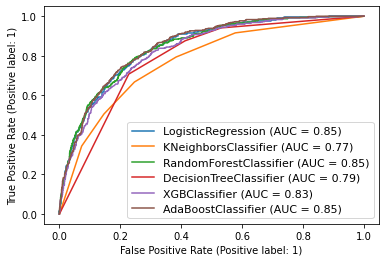

In [184]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

### Saving the Best Model

In [185]:
import pickle

In [186]:
filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [111]:
from IPython.display import Image
Image(url= "https://dataaspirant.com/wp-content/uploads/2017/04/Random-Forest-Introduction.jpg")

In [110]:
# The best model is Random Forest classifier whose accuracy score is 81%.